### Melakukan import libraries yang dibutukan

In [1]:
import pandas as pd
import tensorflow as tf

In [2]:
data=pd.read_excel('./selenagomez_clean_new_normalize.xlsx')
del data['Unnamed: 0']
data

,created_at,username,text,preprocessed,sentiment
0,Thu Mar 02 23:59:30 +0000 2023,darkonsun,social media is a disease and this hailey bieb...,social media disease hailey bieber selena gome...,Neutral
1,Thu Mar 02 23:56:18 +0000 2023,babyyyannieee,Justin Bieber &amp; Selena Gomez followed each...,justin bieber amp selena gomez follow twitter ...,Negative
2,Thu Mar 02 23:55:57 +0000 2023,likabeast101,Selena Gomez drove by my house 🙀,selena gomez drive miss house,Negative
3,Thu Mar 02 23:55:36 +0000 2023,whoismelanyway,I understand hailey Bieber because if my husba...,understand hailey bieber miss husband ex selen...,Negative
4,Thu Mar 02 23:54:50 +0000 2023,_mayyraa,but then i always realize because SELENA GOMEZ...,always realize selena gomez always look good,Positive
...,...,...,...,...,...
5201,Wed Mar 01 10:19:04 +0000 2023,SAFFAOnAirRadio,"@SAFFAOnAirRadio is now playing, Selena Gomez,...",play selena gomez marshmello wolves stream liv...,Positive
5202,Wed Mar 01 10:19:01 +0000 2023,tshepiixx,Go follow Selena Gomez on IG 😡,go follow selena gomez instagram,Neutral
5203,Wed Mar 01 10:17:59 +0000 2023,Chief_I_H8_U,@Ricius496 @endlessbonerz Selena Gomez has a m...,selena gomez medical issue still baddie,Neutral
5204,Wed Mar 01 10:15:42 +0000 2023,vinalraswati,I still can taste it and i hate it. \n\nPeople...,still taste hate people know selena gomez,Negative


In [3]:
data=data[['preprocessed','sentiment']]
data

,preprocessed,sentiment
0,social media disease hailey bieber selena gome...,Neutral
1,justin bieber amp selena gomez follow twitter ...,Negative
2,selena gomez drive miss house,Negative
3,understand hailey bieber miss husband ex selen...,Negative
4,always realize selena gomez always look good,Positive
...,...,...
5201,play selena gomez marshmello wolves stream liv...,Positive
5202,go follow selena gomez instagram,Neutral
5203,selena gomez medical issue still baddie,Neutral
5204,still taste hate people know selena gomez,Negative


In [4]:
data.sentiment = pd.Categorical(pd.factorize(data.sentiment)[0])
data

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24816\1650668707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sentiment = pd.Categorical(pd.factorize(data.sentiment)[0])


,preprocessed,sentiment
0,social media disease hailey bieber selena gome...,0
1,justin bieber amp selena gomez follow twitter ...,1
2,selena gomez drive miss house,1
3,understand hailey bieber miss husband ex selen...,1
4,always realize selena gomez always look good,2
...,...,...
5201,play selena gomez marshmello wolves stream liv...,2
5202,go follow selena gomez instagram,0
5203,selena gomez medical issue still baddie,0
5204,still taste hate people know selena gomez,1


In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
data['preprocessed']=data['preprocessed'].astype(str)
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
tokenizer=Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(data['preprocessed'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24816\1608160908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['preprocessed']=data['preprocessed'].astype(str)


In [7]:
len(tokenizer.word_index)

5402

In [8]:
sequences=tokenizer.texts_to_sequences(data['preprocessed'])
padded=pad_sequences(sequences=sequences,padding=padding_type,truncating=trunc_type)
temp=0
kamus={}
for item in sequences:
    coba=len(item)
    if coba not in kamus:
        kamus[coba]=1
    else:
        kamus[coba]+=1

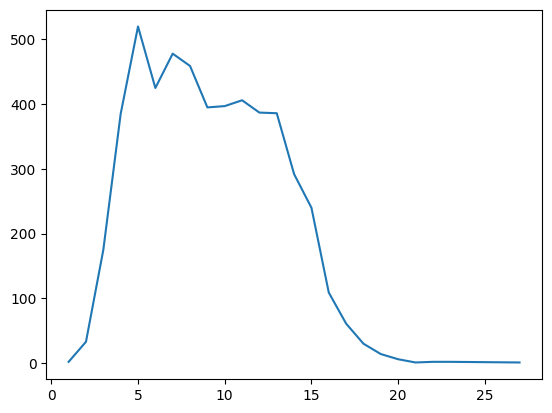

In [9]:
import matplotlib.pylab as plt

lists = sorted(kamus.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [10]:
max_len=max(kamus)
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
tokenizer=Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(data['preprocessed'])
sequences=tokenizer.texts_to_sequences(data['preprocessed'])
padded=pad_sequences(sequences=sequences,padding=padding_type,truncating=trunc_type,maxlen=max_len)
padded

array([[ 196,  226, 1648, ...,    0,    0,    0],
       [  13,    6,   19, ...,    0,    0,    0],
       [   2,    3,  769, ...,    0,    0,    0],
       ...,
       [   2,    3, 1611, ...,    0,    0,    0],
       [  76,  579,   77, ...,    0,    0,    0],
       [ 165,  280, 5401, ...,    0,    0,    0]])

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(padded,data['sentiment'],test_size=0.1,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4685, 27), (521, 27), (4685,), (521,))

In [12]:
y_train= tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test= tf.keras.utils.to_categorical(y_test, num_classes=3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4685, 27), (521, 27), (4685, 3), (521, 3))

In [13]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [14]:
def createSimpleModel(optimizer):
    model=tf.keras.models.Sequential([
            tf.keras.layers.Embedding(len(tokenizer.word_index),16,input_length=max_len),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True,activation='relu')),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(3, activation='softmax')
        ])
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy',f1_m])
    model.summary()
    return model

In [15]:
def createComplexModel(optimizer):
    model=tf.keras.models.Sequential([
        tf.keras.layers.Embedding(len(tokenizer.word_index),128,input_length=max_len),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True,activation='relu',dropout=0.2)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True,activation='relu',dropout=0.2)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True,activation='relu',dropout=0.2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(3,activation='softmax')
        ])
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy',f1_m])
    model.summary()
    return model

In [16]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [17]:
optimizer=['adam','rmsprop']
result=[]
models=[]
for item in optimizer:
    print('Train model with {} optimizer'.format(item))
    model=createSimpleModel(optimizer=item)
    history=model.fit(x_train,y_train,epochs=20,validation_split=0.1,callbacks=[callback])
    models.append(model)
    result.append(history)

Train model with adam optimizer
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 27, 16)            86432     
                                                                 
 bidirectional (Bidirectiona  (None, 27, 128)          41472     
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 3456)              0         
                                                                 
 dense (Dense)               (None, 3)                 10371     
                                                                 
Total params: 138,275
Trainable params: 138,275
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
132/132 [==============================] - 28s 176ms/step - loss: 0.9387 

In [17]:
def compareAccuracy(result,optimizer):
    plt.plot(result[0].history['accuracy'],color='b',label='{}'.format(optimizer[0]))
    plt.plot(result[1].history['accuracy'],color='g',label='{}'.format(optimizer[1]))
    plt.plot(result[0].history['val_accuracy'],color='r',label='Validasi {}'.format(optimizer[0]))
    plt.plot(result[1].history['val_accuracy'],color='c',label='Validasi {}'.format(optimizer[1]))
    plt.xlabel("Epochs")
    plt.ylabel("Nilai")
    plt.title("Akurasi Berdasarkan Optimizer")
    plt.legend()
    plt.figure(figsize=(200 ,200))
    plt.show()
compareAccuracy(result,optimizer)
def compareLoss(result,optimizer):
    plt.plot(result[0].history['loss'],color='b',label='{}'.format(optimizer[0]))
    plt.plot(result[1].history['loss'],color='g',label='{}'.format(optimizer[1]))
    plt.plot(result[0].history['val_loss'],color='r',label='Validasi {}'.format(optimizer[0]))
    plt.plot(result[1].history['val_loss'],color='c',label='Validasi {}'.format(optimizer[1]))
    plt.xlabel("Epochs")
    plt.ylabel("Nilai")
    plt.title("Loss Berdasarkan Optimizer")
    plt.legend()
    plt.figure(figsize=(200 ,200))
    plt.show()
compareLoss(result,optimizer)
def compareF1Score(result,optimizer):
    plt.plot(result[0].history['f1_m'],color='b',label='{}'.format(optimizer[0]))
    plt.plot(result[1].history['f1_m'],color='g',label='{}'.format(optimizer[1]))
    plt.plot(result[0].history['val_f1_m'],color='r',label='Validasi {}'.format(optimizer[0]))
    plt.plot(result[1].history['val_f1_m'],color='c',label='Validasi {}'.format(optimizer[1]))
    plt.xlabel("Epochs")
    plt.ylabel("Nilai")
    plt.title("F1 Score Berdasarkan Optimizer")
    plt.legend()
    plt.figure(figsize=(200 ,200))
    plt.show()
compareF1Score(result,optimizer)

NameError: name 'result' is not defined

In [19]:
for i in range(len(models)):
    temp=models[i].evaluate(x_test,y_test)
    print('model dengan optimizer {} mendapatkan matrix evaluasi '.format(optimizer[i]),temp)

17/17 [==============================] - 0s 19ms/step - loss: 0.6530 - accuracy: 0.8388 - f1_m: 0.8435
model dengan optimizer adam mendapatkan matrix evaluasi  [0.6529922485351562, 0.8387715816497803, 0.843481719493866]
17/17 [==============================] - 0s 21ms/step - loss: 0.6076 - accuracy: 0.8407 - f1_m: 0.8413
model dengan optimizer rmsprop mendapatkan matrix evaluasi  [0.6076180934906006, 0.8406909704208374, 0.841302752494812]


In [20]:
models[0].save('./Model/Simple/Optimizer/adam_after_normalize.h5')
models[1].save('./Model/Simple/Optimizer/rmsprop_after_normalize.h5')

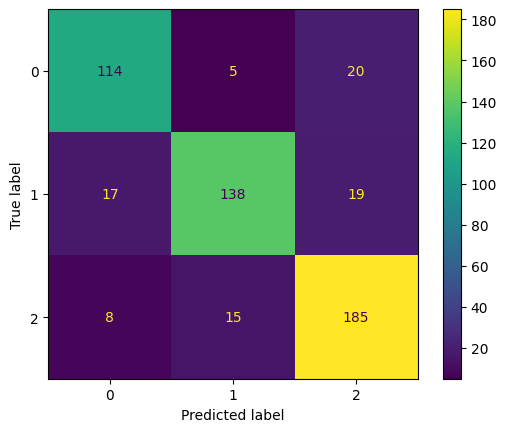

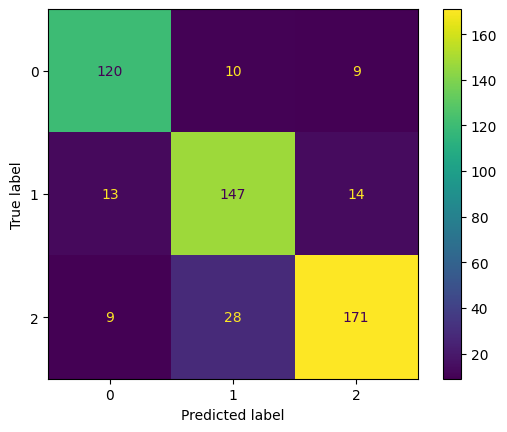

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
for item in models:
    predict=item.predict(x_test)
    confusion=confusion_matrix(np.argmax(y_test,axis=1),np.argmax(predict,axis=1))
    display=ConfusionMatrixDisplay(confusion_matrix=confusion)
    display.plot()

In [30]:
optimizer=['adam','rmsprop']
result_complex=[]
models_complex=[]
for item in optimizer:
    print('Train model with {} optimizer'.format(item))
    model=createComplexModel(optimizer=item)
    history=model.fit(x_train,y_train,epochs=20,validation_split=0.1,callbacks=[callback])
    models_complex.append(model)
    result_complex.append(history)

Train model with adam optimizer


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 27, 128)           691456    
                                                                 
 bidirectional_24 (Bidirecti  (None, 27, 256)          263168    
 onal)                                                           
                                                                 
 bidirectional_25 (Bidirecti  (None, 27, 256)          394240    
 onal)                                                           
                                                                 
 bidirectional_26 (Bidirecti  (None, 27, 256)          394240    
 onal)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 6912)              0         
                                                      

In [31]:
for i in range(len(models_complex)):
    temp=models_complex[i].evaluate(x_test,y_test)
    print('model dengan optimizer {} mendapatkan matrix evaluasi '.format(optimizer[i]),temp)

17/17 [==============================] - 2s 91ms/step - loss: 0.4312 - accuracy: 0.8637 - f1_m: 0.8635
model dengan optimizer adam mendapatkan matrix evaluasi  [0.43119698762893677, 0.863723635673523, 0.8635432124137878]
17/17 [==============================] - 1s 80ms/step - loss: 0.7218 - accuracy: 0.8445 - f1_m: 0.8330
model dengan optimizer rmsprop mendapatkan matrix evaluasi  [0.7217910289764404, 0.8445297479629517, 0.8330193758010864]


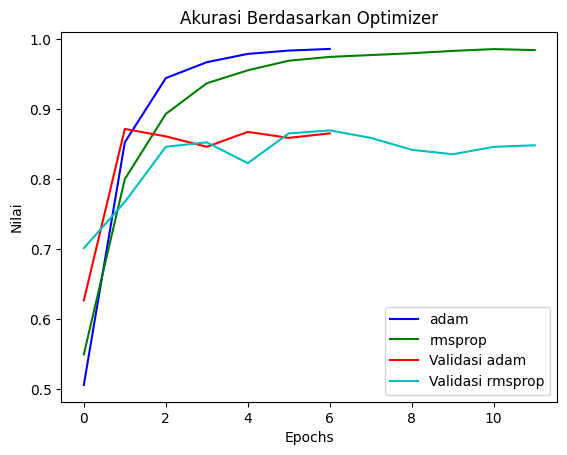

<Figure size 20000x20000 with 0 Axes>

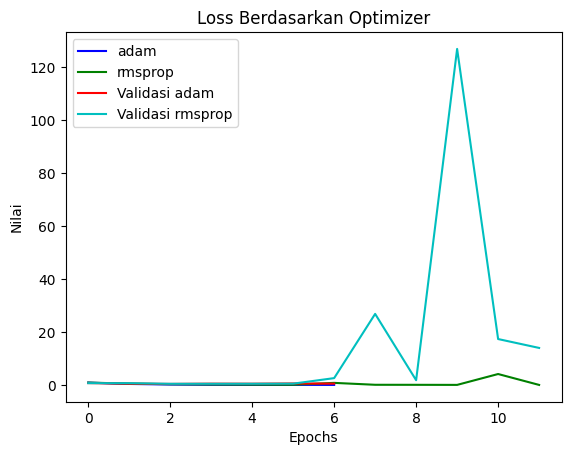

<Figure size 20000x20000 with 0 Axes>

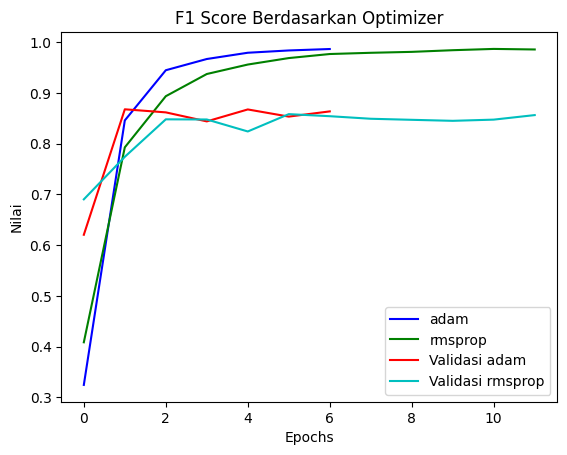

<Figure size 20000x20000 with 0 Axes>

In [32]:
def compareAccuracy(result,optimizer):
    plt.plot(result[0].history['accuracy'],color='b',label='{}'.format(optimizer[0]))
    plt.plot(result[1].history['accuracy'],color='g',label='{}'.format(optimizer[1]))
    plt.plot(result[0].history['val_accuracy'],color='r',label='Validasi {}'.format(optimizer[0]))
    plt.plot(result[1].history['val_accuracy'],color='c',label='Validasi {}'.format(optimizer[1]))
    plt.xlabel("Epochs")
    plt.ylabel("Nilai")
    plt.title("Akurasi Berdasarkan Optimizer")
    plt.legend()
    plt.figure(figsize=(200 ,200))
    plt.show()
compareAccuracy(result_complex,optimizer)
def compareLoss(result,optimizer):
    plt.plot(result[0].history['loss'],color='b',label='{}'.format(optimizer[0]))
    plt.plot(result[1].history['loss'],color='g',label='{}'.format(optimizer[1]))
    plt.plot(result[0].history['val_loss'],color='r',label='Validasi {}'.format(optimizer[0]))
    plt.plot(result[1].history['val_loss'],color='c',label='Validasi {}'.format(optimizer[1]))
    plt.xlabel("Epochs")
    plt.ylabel("Nilai")
    plt.title("Loss Berdasarkan Optimizer")
    plt.legend()
    plt.figure(figsize=(200 ,200))
    plt.show()
compareLoss(result_complex,optimizer)
def compareF1Score(result,optimizer):
    plt.plot(result[0].history['f1_m'],color='b',label='{}'.format(optimizer[0]))
    plt.plot(result[1].history['f1_m'],color='g',label='{}'.format(optimizer[1]))
    plt.plot(result[0].history['val_f1_m'],color='r',label='Validasi {}'.format(optimizer[0]))
    plt.plot(result[1].history['val_f1_m'],color='c',label='Validasi {}'.format(optimizer[1]))
    plt.xlabel("Epochs")
    plt.ylabel("Nilai")
    plt.title("F1 Score Berdasarkan Optimizer")
    plt.legend()
    plt.figure(figsize=(200 ,200))
    plt.show()
compareF1Score(result_complex,optimizer)

In [25]:
models_complex[0].save('./Model/Complex/Optimizer/adam_after_normalize.h5')
models_complex[1].save('./Model/Complex/Optimizer/rmsprop_after_normalize.h5')